# Dynamic Regression Models

In [1]:
import sys
from utils import *

In [2]:
import warnings
warnings.simplefilter('ignore')

## Regression ARIMA

In [3]:
us_change = pd.read_csv(r'C:\Users\machr\Desktop\Python\Code\Forecasting Principles and Practice 3\fpp3-data-main\fpp3\us_change.csv')
us_change = (us_change
 .assign(date=pd.to_datetime(us_change.Quarter.str.replace(' ', '')))
 .set_index('date')
 .pipe(set_freq))

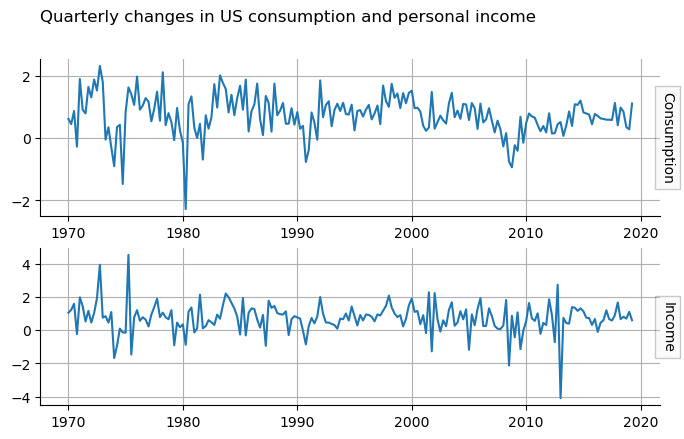

In [4]:
fig, axs = plt.subplots(2)
axs[0].plot(us_change.Consumption)
rlabel(axs[0], 'Consumption')
axs[1].plot(us_change.Income)
rlabel(axs[1], 'Income')
suptitle('Quarterly changes in US consumption and personal income')
for ax in axs:
    ax.grid()

In [5]:
split = us_change.index.max() + pd.to_timedelta('1d')
d = extend_timeseries(us_change, 'today')
dtrain, dtest = d[:split], d[split:]

In [6]:
fit = sm.tsa.statespace.SARIMAX(dtrain.Consumption, dtrain.Income, order=(1,0,2), trend='c').fit()

In [7]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  198
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -163.036
Date:                Fri, 21 Mar 2025   AIC                            338.072
Time:                        08:24:07   BIC                            357.802
Sample:                    01-01-1970   HQIC                           346.058
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1742      0.062      2.788      0.005       0.052       0.297
Income         0.1976      0.034      5.855      0.000       0.131       0.264
ar.L1          0.7071      0.106      6.659      0.000       0.499       0.915
ma.L1         -0.6173      0.113     -5.470      0.000      -0.839      -0.396
ma.L2          0.2066      0.065      3.174      0.002       0.079       0.334
sigma2         0.3035      0.022     13.525      0.000       0.260       0.347
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                45.83
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

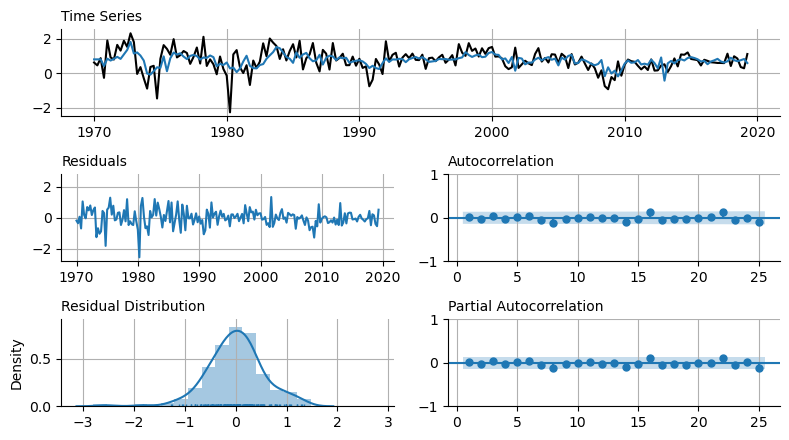

In [8]:
plot_tsresiduals(dtrain.Consumption, fit.fittedvalues);

In [9]:
sm.stats.acorr_ljungbox(dtrain.Consumption - fit.fittedvalues, 
                        lags=[8], model_df=5, boxpierce=True, return_df=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
8,5.22128,0.156293,4.99043,0.172499


In [10]:
auto_arima_kw = dict(suppress_warnings=True, error_action='ignore', trace=True)

In [11]:
fit = pmd.auto_arima(dtrain.Consumption, dtrain[['Income']], **auto_arima_kw)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=338.516, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=357.307, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=353.625, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=356.125, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=437.987, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=338.072, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=346.555, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=342.489, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=339.377, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=341.465, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=339.637, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=341.231, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=352.419, Time=0.11 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.647 seconds


In [12]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  198
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -163.036
Date:                Fri, 21 Mar 2025   AIC                            338.072
Time:                        08:24:10   BIC                            357.802
Sample:                    01-01-1970   HQIC                           346.058
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1742      0.062      2.788      0.005       0.052       0.297
Income         0.1976      0.034      5.855      0.000       0.131       0.264
ar.L1          0.7071      0.106      6.659      0.000       0.499       0.915
ma.L1         -0.6173      0.113     -5.470      0.000      -0.839      -0.396
ma.L2          0.2066      0.065      3.174      0.002       0.079       0.334
sigma2         0.3035      0.022     13.525      0.000       0.260       0.347
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                45.83
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

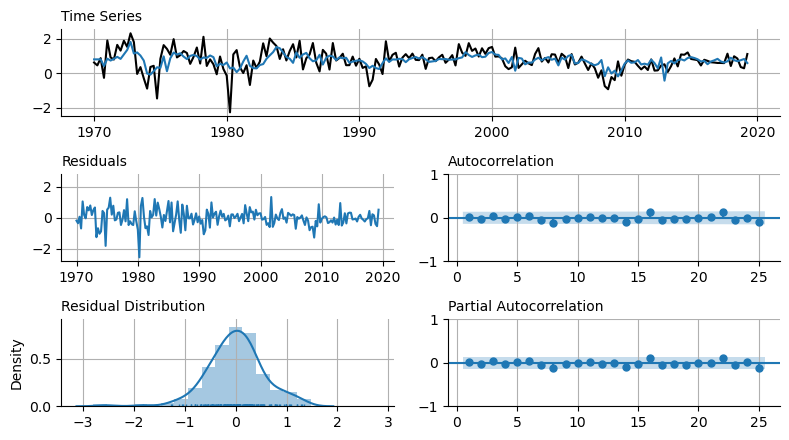

In [13]:
plot_tsresiduals(dtrain.Consumption, fit.arima_res_.fittedvalues);

## Forecasting

### US Personal Consumption and Income

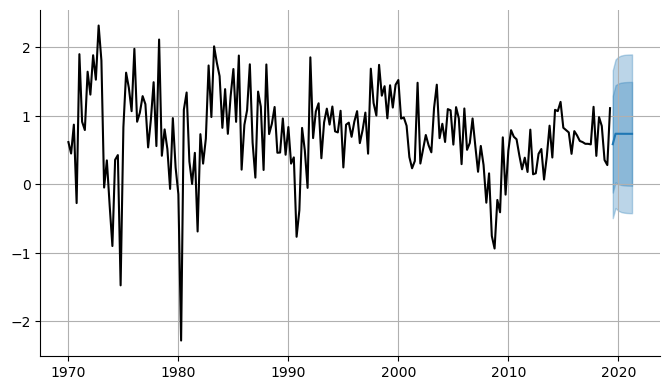

In [14]:
fig, ax = plt.subplots()
ax.plot(us_change.Consumption, 'k')
exog = np.repeat(dtrain.Income.mean(), 8)
fc = fit.arima_res_.get_forecast(len(exog), exog=exog)
ax.plot(fc.predicted_mean)
ci = ciclean(fc.conf_int())
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')
ci = ciclean(fc.conf_int(alpha=.2))
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')
ax.grid()

## Forecasting electricity demand

In [15]:
vic_elec = (pd.read_csv(r'C:\Users\machr\Desktop\Python\Code\Forecasting Principles and Practice 3\fpp3-data-main\tsibbledata\vic_elec.csv', parse_dates=['Time'], infer_datetime_format=True)
    .query('Time.dt.year == 2014')
    .set_index('Time', drop=False)
    .resample('1d')
    .agg(dict(Demand='sum', Temperature='mean', Holiday='any', Time='min'))
    .pipe(compute, lambda x: dict(
        Demand = x.Demand / 1e3,
        DayOfWeek = x.Time.dt.strftime('%A'),))
    .pipe(compute, lambda x: dict(Day_Type = np.where(x.Holiday, 'Holiday', np.where(x.DayOfWeek.isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday'))))
    .pipe(compute, lambda x: dict(Is_Work_Day = x.Day_Type.eq('Weekend')))
    .iloc[:-1])
vic_elec

,Temperature,Holiday,Time,Demand,DayOfWeek,Day_Type,Is_Work_Day
Time,,,,,,,
2014-01-01 00:00:00+00:00,20.031250,True,2014-01-01 00:00:00+00:00,179.453794,Wednesday,Holiday,False
2014-01-02 00:00:00+00:00,17.487500,False,2014-01-02 00:00:00+00:00,190.778816,Thursday,Weekday,False
2014-01-03 00:00:00+00:00,17.718750,False,2014-01-03 00:00:00+00:00,182.892121,Friday,Weekday,False
2014-01-04 00:00:00+00:00,16.575000,False,2014-01-04 00:00:00+00:00,171.285812,Saturday,Weekend,True
2014-01-05 00:00:00+00:00,17.606250,False,2014-01-05 00:00:00+00:00,179.734300,Sunday,Weekend,True
...,...,...,...,...,...,...,...
2014-12-26 00:00:00+00:00,16.429167,True,2014-12-26 00:00:00+00:00,168.797125,Friday,Holiday,False
2014-12-27 00:00:00+00:00,18.189583,False,2014-12-27 00:00:00+00:00,173.292326,Saturday,Weekend,True
2014-12-28 00:00:00+00:00,24.539583,False,2014-12-28 00:00:00+00:00,196.116229,Sunday,Weekend,True


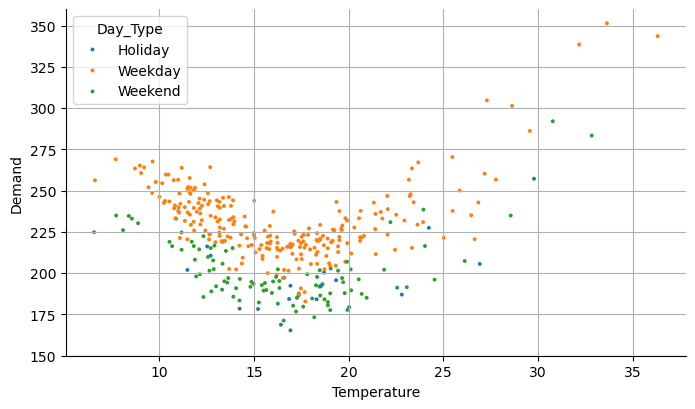

In [16]:
fig, ax = plt.subplots()
d = vic_elec
sns.scatterplot(x='Temperature', y='Demand', hue='Day_Type',  data=d, ax=ax, linewidth=0, s=8)
ax.set(ylim=(150, 360))
ax.grid();

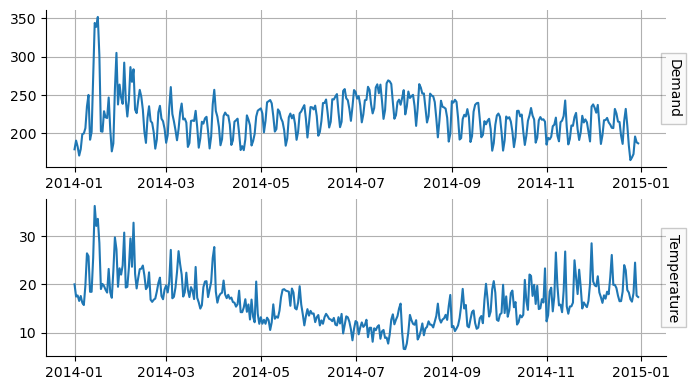

In [17]:
fig, axs = plt.subplots(2)
axs[0].plot(d.Demand)
rlabel(axs[0], 'Demand')
axs[1].plot(d.Temperature)
rlabel(axs[1], 'Temperature')
for ax in axs:
    ax.grid()

In [18]:
d = vic_elec.copy()
d['Temperature2'] = d.Temperature**2
split = d.index.max() + pd.to_timedelta('1h')
d = extend_timeseries(d, dt='28d')
d['Time'] = d.index
dtrain, dtest = d[:split], d[split:]

In [19]:
fit = pmd.auto_arima(dtrain.Demand, dtrain['Temperature Temperature2 Is_Work_Day'.split()].astype(float), **auto_arima_kw)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2760.623, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2811.725, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2811.300, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2806.584, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2809.728, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2760.330, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2767.296, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2761.827, Time=0.73 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2762.006, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2758.244, Time=0.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2797.420, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2757.451, Time=0.70 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2788.242, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : 

In [20]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  364
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1359.827
Date:                Fri, 21 Mar 2025   AIC                           2737.654
Time:                        08:24:25   BIC                           2772.704
Sample:                    01-01-2014   HQIC                          2751.586
                         - 12-30-2014                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Temperature     -9.2921      0.802    -11.579      0.000     -10.865      -7.719
Temperature2     0.2784      0.017     16.101      0.000       0.244       0.312
Is_Work_Day    -17.5623      1.258    -13.961      0.000     -20.028     -15.097
ar.L1           -0.1833      0.037     -4.952      0.000      -0.256      -0.111
ar.L2           -0.3494      0.034    -10.355      0.000      -0.416      -0.283
ar.L3           -0.2917      0.041     -7.114      0.000      -0.372      -0.211
ar.L4           -0.3598      0.039     -9.344      0.000      -0.435      -0.284
ar.L5           -0.2412      0.042     -5.750      0.000      -0.323      -0.159
sigma2         104.4027      5.657     18.454      0.000      93.314     115.491
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               191.10
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

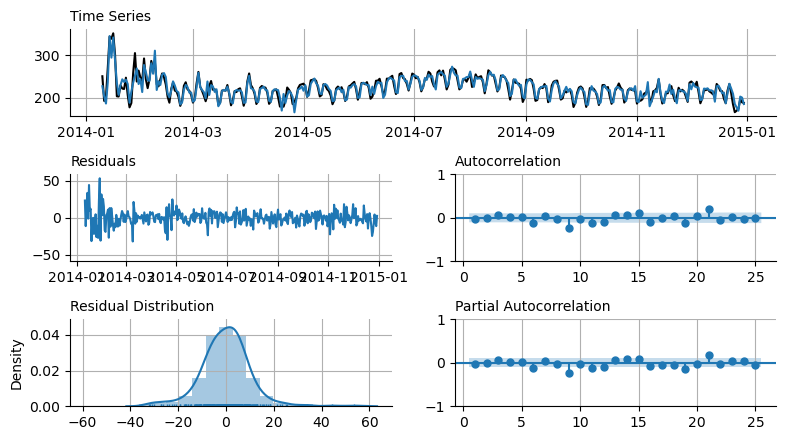

In [21]:
t0 = '2014-01-10'
plot_tsresiduals(dtrain[t0:].Demand, fit.arima_res_.fittedvalues[t0:]);

In [22]:
ddtest = dtest.assign(Temperature=26, Temperature2=26**2, Holiday=np.r_[False, True, np.repeat(False, len(dtest)-2)])
ddtest['Is_Work_Day'] = ((~ddtest.Holiday) & (~ddtest.Time.dt.day_name().isin(['Saturday', 'Sunday'])))

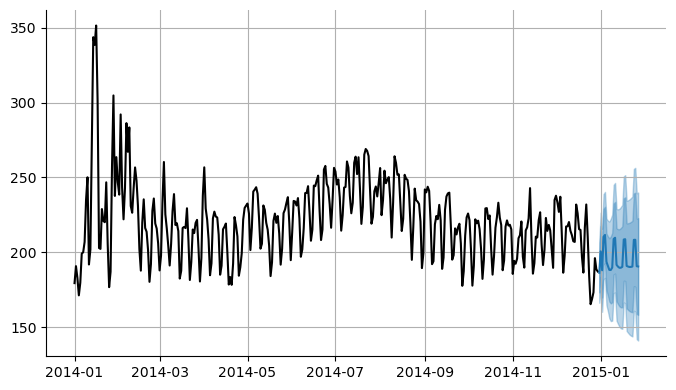

In [23]:
fig, ax = plt.subplots()
ax.plot(dtrain.Demand, 'k')

fc = fit.arima_res_.get_forecast(
    len(ddtest), exog=ddtest['Temperature Temperature2 Is_Work_Day'.split()].astype(float))

ax.plot(fc.predicted_mean)
ci = ciclean(fc.conf_int())
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')
ci = ciclean(fc.conf_int(alpha=.2))
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')
ax.grid()

In [24]:
fit2 = pmd.auto_arima(dtrain.Demand, dtrain['Temperature Temperature2 Is_Work_Day'.split()].astype(float),
               start_P=1, start_Q=1,
               max_P=3, max_Q=3,
               d=0, D=1,
               start_p=1, start_q=1,
               max_p=3, max_q=3, m=7,
               seasonal=True,
               stepwise=True,
               **auto_arima_kw)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2893.426, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2714.252, Time=1.04 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=2743.845, Time=0.98 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2891.479, Time=0.21 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2766.480, Time=0.54 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2665.492, Time=1.84 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=2621.437, Time=3.20 sec
 ARIMA(1,0,0)(3,1,1)[7] intercept   : AIC=2619.952, Time=3.27 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=2619.599, Time=2.16 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=2615.845, Time=1.18 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=2612.969, Time=1.05 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=2817.2

In [25]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  364
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -1289.375
Date:                           Fri, 21 Mar 2025   AIC                           2594.749
Time:                                   08:25:36   BIC                           2625.771
Sample:                               01-01-2014   HQIC                          2607.088
                                    - 12-30-2014                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Temperature     -9.2505      0.637    -14.517      0.000     -10.499      -8.002
Temperature2     0.2800      0.014     19.994      0.000       0.253       0.307
Is_Work_Day     10.0371      4.217      2.380      0.017       1.772      18.302
ar.L1            1.4253      0.065     21.821      0.000       1.297       1.553
ar.L2           -0.4259      0.065     -6.539      0.000      -0.554      -0.298
ma.L1           -0.7471      0.052    -14.400      0.000      -0.849      -0.645
ma.S.L7         -0.9231      0.045    -20.611      0.000      -1.011      -0.835
sigma2          73.7432      3.717     19.842      0.000      66.459      81.028
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1067.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
ddtest = dtest.assign(Temperature=26, Temperature2=26**2, Holiday=np.r_[False, True, np.repeat(False, len(dtest)-2)])
ddtest['Is_Work_Day'] = ((~ddtest.Holiday) & (~ddtest.Time.dt.day_name().isin(['Saturday', 'Sunday'])))

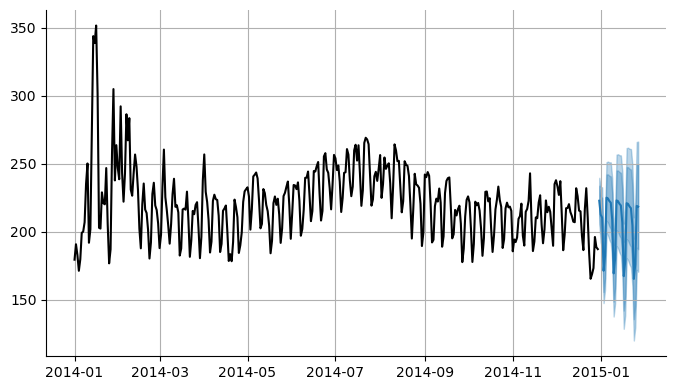

In [27]:
fig, ax = plt.subplots()
ax.plot(dtrain.Demand, 'k')

fc = fit2.arima_res_.get_forecast(
    len(ddtest),
    exog=ddtest['Temperature Temperature2 Is_Work_Day'.split()].astype(float))

ax.plot(fc.predicted_mean)
ci = ciclean(fc.conf_int())
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')
ci = ciclean(fc.conf_int(alpha=.2))
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')
ax.grid()

## Stochastic and deterministic trends

### International visitors to Australia

In [28]:
aus_visitors = rdatasets.data('fpp2', 'austa')
aus_visitors = (aus_visitors.set_index(pd.to_datetime(aus_visitors.time, format='%Y'))
 .pipe(set_freq))

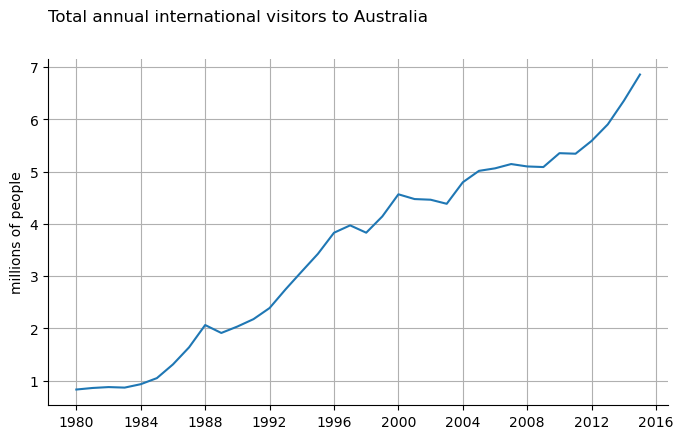

In [29]:
fig, ax = plt.subplots()
ax.plot(aus_visitors.value)
ax.set(ylabel='millions of people')
suptitle('Total annual international visitors to Australia')
ax.grid()

In [30]:
fit = sm.tsa.SARIMAX(aus_visitors.value, trend='ct', order=(2,0,0)).fit()

In [31]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   36
Model:               SARIMAX(2, 0, 0)   Log Likelihood                  14.218
Date:                Fri, 21 Mar 2025   AIC                            -18.436
Time:                        08:25:36   BIC                            -10.519
Sample:                    01-01-1980   HQIC                           -15.673
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1811      0.109      1.669      0.095      -0.032       0.394
drift          0.0462      0.020      2.288      0.022       0.007       0.086
ar.L1          1.1020      0.166      6.621      0.000       0.776       1.428
ar.L2         -0.3631      0.163     -2.226      0.026      -0.683      -0.043
sigma2         0.0256      0.008      3.162      0.002       0.010       0.041
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.95   Prob(JB):                         0.96
Heteroskedasticity (H):               1.67   Skew:                            -0.03
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
fit2 = sm.tsa.SARIMAX(aus_visitors.value, trend='c', order=(2,1,0)).fit()

In [33]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   36
Model:               SARIMAX(2, 1, 0)   Log Likelihood                  10.710
Date:                Fri, 21 Mar 2025   AIC                            -13.419
Time:                        08:25:37   BIC                             -7.198
Sample:                    01-01-1980   HQIC                           -11.272
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1461      0.050      2.915      0.004       0.048       0.244
ar.L1          0.2910      0.194      1.501      0.133      -0.089       0.671
ar.L2         -0.1373      0.224     -0.613      0.540      -0.576       0.302
sigma2         0.0317      0.012      2.720      0.007       0.009       0.054
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.64
Prob(Q):                              0.99   Prob(JB):                         0.44
Heteroskedasticity (H):               1.34   Skew:                            -0.22
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

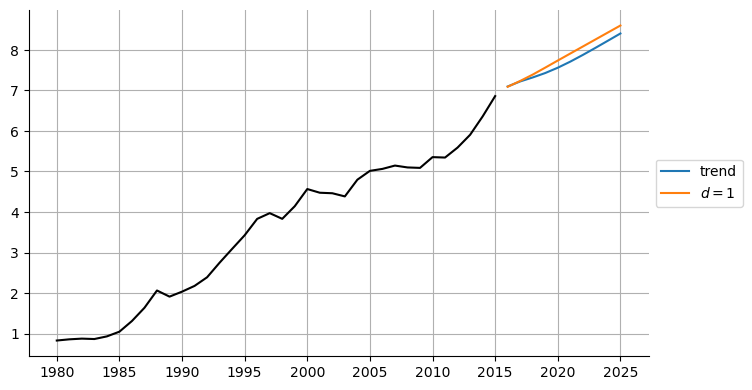

In [34]:
fig, ax = plt.subplots()
ax.plot(aus_visitors.value, 'k')

fc = fit.get_forecast(10)
ax.plot(fc.predicted_mean, label='trend')

fc = fit2.get_forecast(10)
ax.plot(fc.predicted_mean, label='$d=1$')

ax.legend(**legend_right)

ax.grid()

## Dynamic harmonic regression

In [35]:
aus_cafe = (pd.read_csv(r'C:\Users\machr\Desktop\Python\Code\Forecasting Principles and Practice 3\fpp3-data-main\tsibbledata\aus_retail.csv', parse_dates=['Month'], infer_datetime_format=True)
 .query('Industry.str.contains("takeaway")')
 .query('Month.dt.year.between(2004, 2018)')
 .groupby('Month').Turnover.sum()
 .pipe(set_freq))

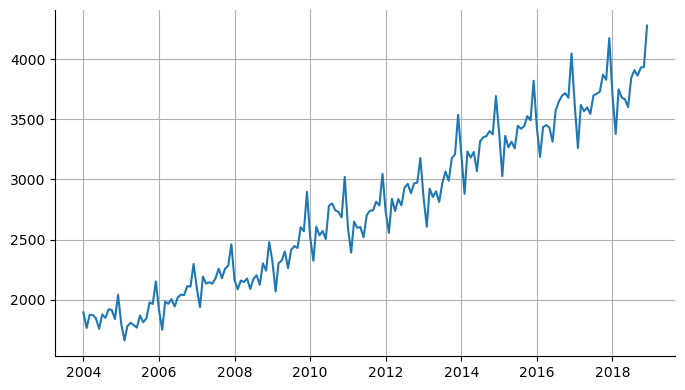

In [36]:
fig, ax = plt.subplots()
ax.plot(aus_cafe)
ax.grid()

In [37]:
fits = {k: sm.tsa.UnobservedComponents(aus_cafe, 
                                level=True, trend=True, 
                                freq_seasonl=[{'period':12, 'harmonics':k}]).fit() for k in range(1, 7)}

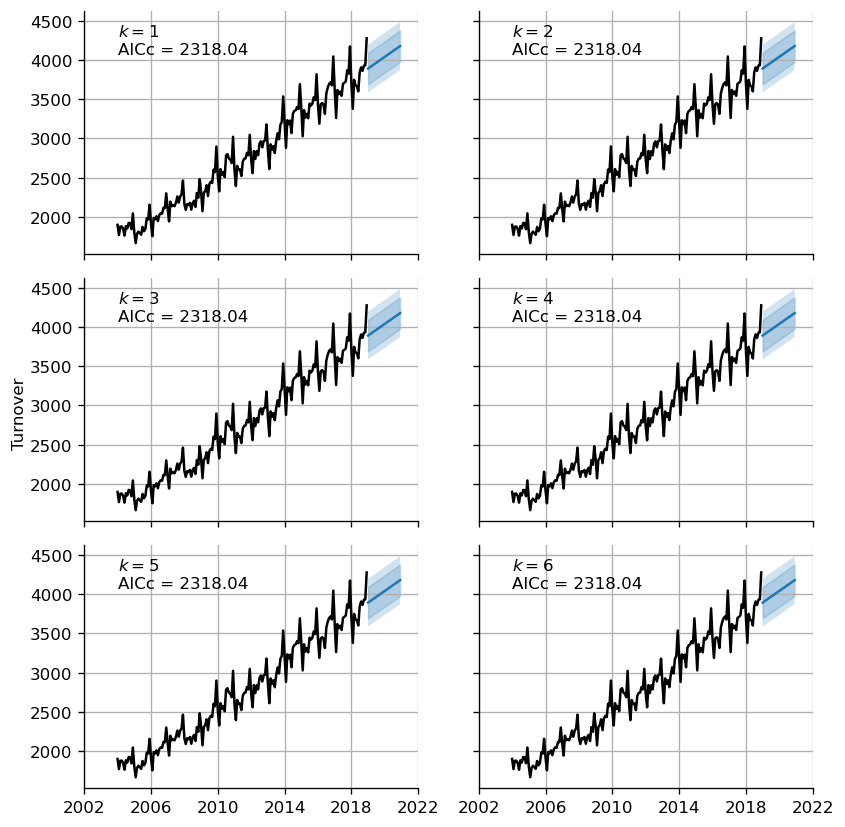

In [38]:
fig, axs = plt.subplots(3, 2, figsize=(7, 7), sharex=True, sharey=True, dpi=120)
axs = axs.ravel()
for (ax, (k, fit)) in zip(axs, fits.items()):
    ax.plot(aus_cafe, 'k')
    fc = fit.get_forecast(24)
    ax.plot(fc.predicted_mean)
    ci = ciclean(fc.conf_int())
    ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.2)
    ci = ciclean(fc.conf_int(alpha=.2))
    ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.2, color='C0')
    ax.grid()
    xdate(ax, '%Y', '4ys')
    ax.text(.1, .95, f'$k={k}$\nAICc = {fit.aicc:.2f}', va='top', transform=ax.transAxes)
fig.text(0, .5, 'Turnover', rotation=90, va='center')
plt.tight_layout()

## Lagged predictors

### TV advertising and insurance quotations

In [39]:
d = rdatasets.data('fpp2', 'insurance')
d.columns = 'rownames', 'Quotes', 'TV_advert'
d = d.set_index(pd.date_range('2002-01-01', '2005-04-01', freq='MS'))
d = extend_timeseries(d, dt='365d')
for lag in range(4):
    d[f'advert_{lag}'] = d.TV_advert.shift(lag)
insurance = d = d.dropna()

In [40]:
dtrain = d.iloc[:32]
dtest = d.iloc[32:]

In [41]:
%%time
lag0 = pmd.auto_arima(dtrain.Quotes, dtrain['advert_0'.split()], d=0, suppress_warnings=True)
lag1 = pmd.auto_arima(dtrain.Quotes, dtrain['advert_0 advert_1'.split()], d=0, suppress_warnings=True)
lag2 = pmd.auto_arima(dtrain.Quotes, dtrain['advert_0 advert_1 advert_2'.split()], d=0, suppress_warnings=True)
lag3 = pmd.auto_arima(dtrain.Quotes, dtrain['advert_0 advert_1 advert_2 advert_3'.split()], d=0, suppress_warnings=True)

CPU times: total: 5 s
Wall time: 5.08 s


In [42]:
lags = lag0, lag1, lag2, lag3
lags

(ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True))

In [43]:
pd.DataFrame([dict(aic=l.aic(), aicc=l.aicc(), bic=l.bic(), fit=l) for l in (lags)])

,aic,aicc,bic,fit
0,59.052931,61.360623,66.381610,"ARIMA(1,0,1)(0,0,0)[0] intercept"
1,53.372556,55.680248,60.701235,"ARIMA(1,0,1)(0,0,0)[0]"
2,55.360453,58.720453,64.154868,"ARIMA(1,0,1)(0,0,0)[0]"
3,56.819785,63.080655,68.545672,"ARIMA(1,0,1)(0,0,0)[0] intercept"


In [44]:
fit = lag1.arima_res_
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -21.686
Date:                Fri, 21 Mar 2025   AIC                             53.373
Time:                        08:25:47   BIC                             60.701
Sample:                    04-01-2002   HQIC                            55.802
                         - 11-01-2004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
advert_0       1.3724      0.066     20.686      0.000       1.242       1.502
advert_1       0.2727      0.060      4.520      0.000       0.154       0.391
ar.L1          0.7035      0.201      3.508      0.000       0.310       1.097
ma.L1          0.6170      0.226      2.735      0.006       0.175       1.059
sigma2         0.2141      0.066      3.257      0.001       0.085       0.343
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                14.24
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                            -1.26
Prob(H) (two-sided):                  0.11   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

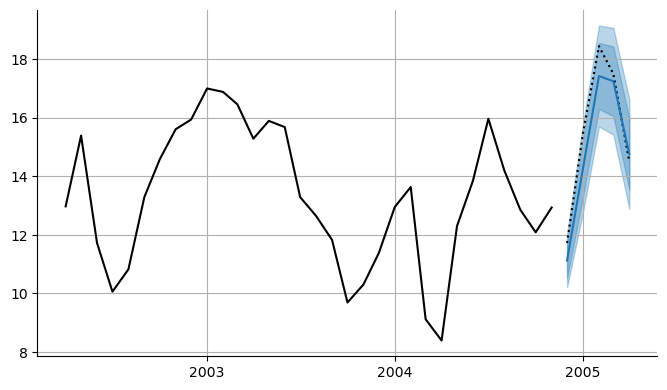

In [45]:
fig, ax = plt.subplots()
ax.plot(dtrain.Quotes, 'k')
ax.plot(dtest.Quotes, 'k:')

fc = fit.get_forecast(
    len(dtest), exog=dtest['advert_0 advert_1'.split()])

ax.plot(fc.predicted_mean)
ci = ciclean(fc.conf_int())
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')
ci = ciclean(fc.conf_int(alpha=.2))
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')

xdate(ax, '%Y', '1ys')
ax.grid()

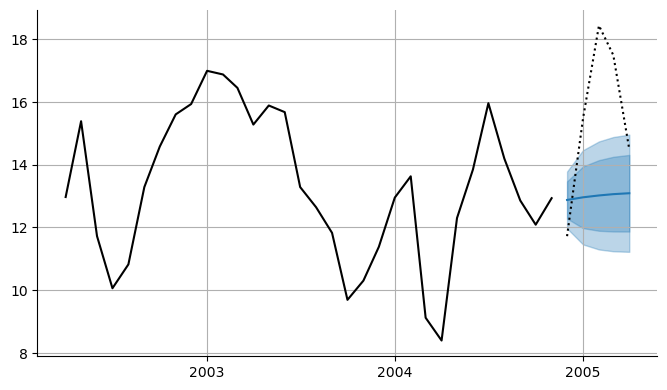

In [46]:
fig, ax = plt.subplots()
ax.plot(dtrain.Quotes, 'k')
ax.plot(dtest.Quotes, 'k:')

fc = fit.get_forecast(
    len(dtest), exog=dtest.assign(advert_0=8, advert_1=8)['advert_0 advert_1'.split()])

ax.plot(fc.predicted_mean)
ci = ciclean(fc.conf_int())
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')
ci = ciclean(fc.conf_int(alpha=.2))
ax.fill_between(ci.index, ci.lower, ci.upper, alpha=.3, color='C0')

xdate(ax, '%Y', '1ys')
ax.grid()